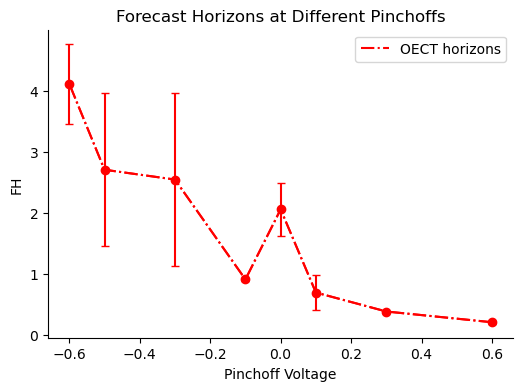

In [1]:
import shelve

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

with shelve.open("./Data/new/Data/signals_pinchoffs") as data:
    datadicts = data["dicts"]
    pinchoffs = data["pinchoffs"]
    t = data["time"]

tolerance = 5  # error tolerance

iterations = 10
dim = 300

OECT_hm = []
tanh_hm = []


# Ensemble begin
for iter in range(iterations):
    OECT_signals = datadicts[iter]["OECT_signals"]
    OECT_predictions = datadicts[iter]["OECT_predictions"]
    tanh_signals = datadicts[iter]["tanh_signals"]
    tanh_predictions = datadicts[iter]["tanh_predictions"]
    

    OECT_horizons = []
    tanh_horizons = []

    for i in range(len(pinchoffs)):
        n = dim
        p = pinchoffs[i]

        OECT_signal = OECT_signals[i]
        OECT_prediction = OECT_predictions[i]

        j = 0
        while np.sqrt(np.sum(np.square(OECT_signal[j] - OECT_prediction[j]))) <= tolerance:
            j += 1
        OECT_horizons.append(t[j])

        tanh_signal = tanh_signals[i]
        tanh_prediction = tanh_predictions[i]

        j = 0
        while np.sqrt(np.sum(np.square(tanh_signal[j] - tanh_prediction[j]))) <= tolerance:
            j += 1
        tanh_horizons.append(t[j])
    
    OECT_hm.append(OECT_horizons)
    tanh_hm.append(tanh_horizons)

OECT_hm = np.array(OECT_hm).T

OECT_means = [np.average(OECT_hm[i]) for i in range(OECT_hm.shape[0])]
OECT_stds = [np.std(OECT_hm[i]) for i in range(OECT_hm.shape[0])]

tanh_hm = np.array(tanh_hm).T

tanh_means = [np.average(tanh_hm[i]) for i in range(tanh_hm.shape[0])]
tanh_stds = [np.std(tanh_hm[i]) for i in range(tanh_hm.shape[0])]

    

# Ensemble end

plt.figure(figsize=(6, 4))
plt.title("Forecast Horizons at Different Pinchoffs")
# plt.plot(pinchoffs, tanh_means, "k-", label="tanh horizons")
# plt.errorbar(pinchoffs, tanh_means, yerr = tanh_stds, fmt ='k-', marker="o", capsize=3)
plt.plot(pinchoffs, OECT_means, "r-.", label="OECT horizons")
plt.errorbar(pinchoffs, OECT_means, yerr = OECT_stds, fmt ='r-.', marker="o", capsize=3)
plt.ylabel("FH")
plt.xlabel("Pinchoff Voltage")
# make x axis logarithmic


# use seaborn to despine
sns.despine()

plt.legend()

# TODO is standard deviation the right thing for the error bars?

# TODO seaborn dodge.